In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [25]:
x = np.linspace(-5, 10, 1000)

In [26]:
def posterior(likelihood, prior):
    norm = sp.integrate.quad(lambda x: likelihood(x)*prior(x), -np.inf, np.inf)[0]
    return lambda x: likelihood(x)*prior(x)/norm

likelihood = sp.stats.norm(0,1).pdf
prior = sp.stats.norm(5,0.5).pdf
post = posterior(likelihood, prior)

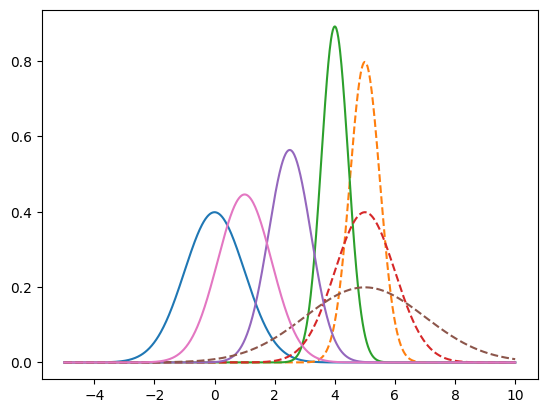

In [27]:
plt.plot(x, likelihood(x))

prior = sp.stats.norm(5,0.5).pdf
post = posterior(likelihood, prior)
plt.plot(x, prior(x), '--')
plt.plot(x, post(x))

prior = sp.stats.norm(5,1).pdf
post = posterior(likelihood, prior)
plt.plot(x, prior(x), '--')
plt.plot(x, post(x))

prior = sp.stats.norm(5,2).pdf
post = posterior(likelihood, prior)
plt.plot(x, prior(x), '--')
plt.plot(x, post(x))

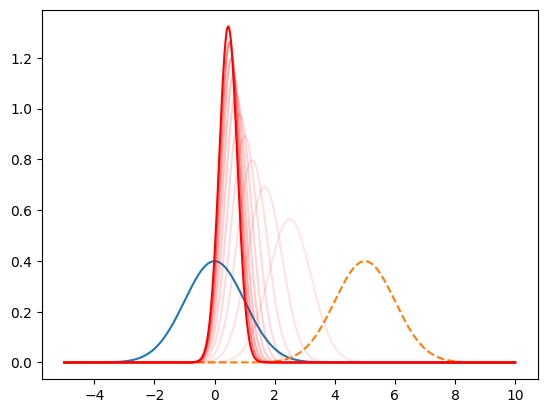

In [31]:
likelihood = sp.stats.norm(0,1).pdf
prior = sp.stats.norm(5,1).pdf
post = posterior(likelihood, prior)

plt.plot(x, likelihood(x))
plt.plot(x, prior(x), '--')
plt.plot(x, post(x), color='red', alpha=1/(10))

for i in range(1,10):
    post = posterior(likelihood, post)
    plt.plot(x, post(x), color='red', alpha=1/(10-i))

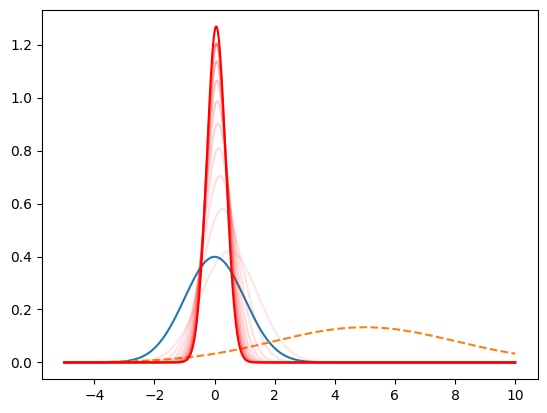

In [29]:
likelihood = sp.stats.norm(0,1).pdf
prior = sp.stats.norm(5,3).pdf
post = posterior(likelihood, prior)

plt.plot(x, likelihood(x))
plt.plot(x, prior(x), '--')
plt.plot(x, post(x), color='red', alpha=1/(10))

for i in range(1,10):
    post = posterior(likelihood, post)
    plt.plot(x, post(x), color='red', alpha=1/(10-i))
